#Mode Mixing Separation in Empirical Mode Decomposition of Signals with Spectral Proximity
Olav B. Fosso, Marta Molinas

In [ ]:
!pip install emd

In [71]:
#case study proposed in the paper

import numpy as np
import emd 
import matplotlib.pyplot as plt 

seconds = 2
sample_rate = 1000
t = np.linspace(0, seconds, seconds*sample_rate)

f1 = 8
f2 = 24
f3 = 30

x1 = 0.7*np.sin(2*np.pi*f1*t) 
x2 = 0.7*np.sin(2*np.pi*f2*t)
x3 = 1.4*np.sin(2*np.pi*f3*t)
x = x1 + x2 + x3 

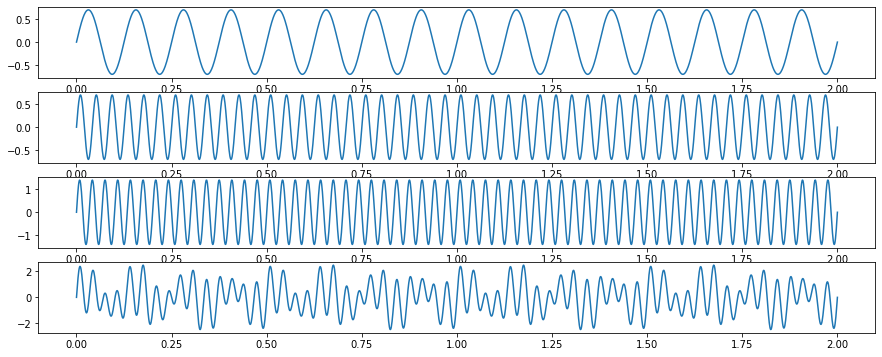

In [16]:
#plot the signals individually
fig, ax = plt.subplots(4,1, figsize=(15,6))
ax[0].plot(t,x1)
ax[1].plot(t,x2)
ax[2].plot(t,x3)
ax[3].plot(t,x)

/usr/local/lib/python3.8/dist-packages/emd/plotting.py:133: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


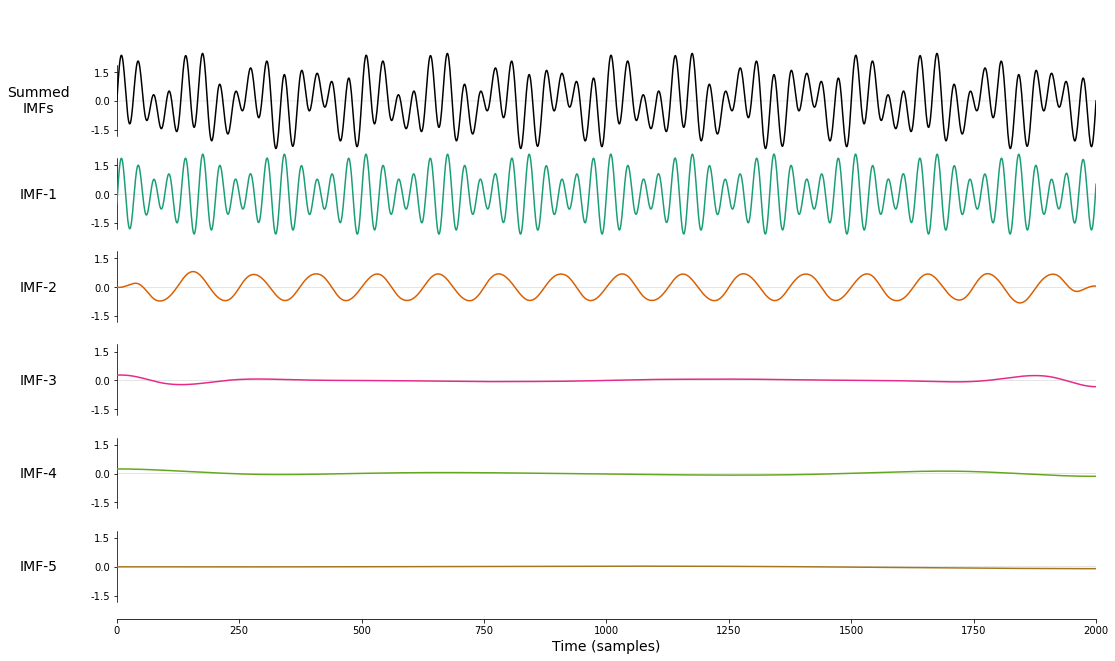

In [72]:
imf = emd.sift.sift(x, max_imfs=5)
emd.plotting.plot_imfs(imf)

- The first plot corresponds to the signal

- The first IMF is the mix of the signals 24Hz and 30 Hz while

- The second IMF is the 8Hz signal well separated

To identify the frequencies and amplitudes involved in the first IMF, a Hilbert transform is performed and the instantaneous amplitudes and frequencies are calculated

In [90]:
IP, IF, IA = emd.spectra.frequency_transform(imf, sample_rate, 'nht', smooth_freq=21)

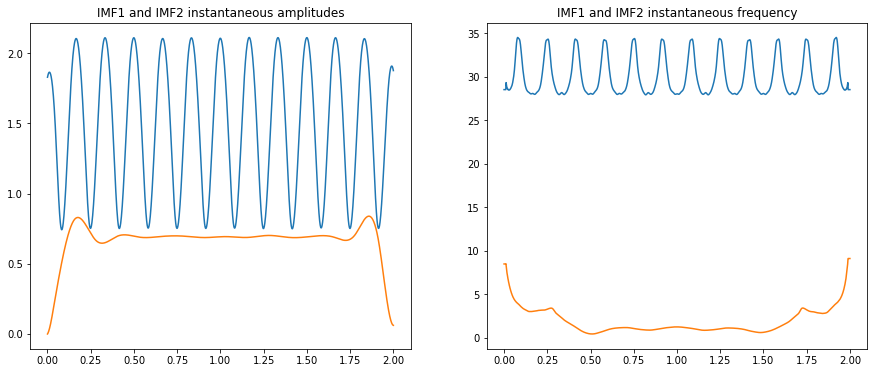

In [74]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
ax[0].plot(t, IA[:, :2])
ax[0].set_title('IMF1 and IMF2 instantaneous amplitudes')
ax[1].plot(t, IF[:,:3:2])
ax[1].set_title('IMF1 and IMF2 instantaneous frequency')
plt.show()

To estimate the amplitudes and frequencies of the tones involved, we need to find the maximum and minimum of the amplitude function and of the instantaneous frequency function.

In [28]:
Kmax1 = IA[:,:1].max()
Kmin1 =  IA[:,:1].min()

In [75]:
#o valor de A será a amplitude do sinal que tem o maior valor de freq
#pois f1 > f2

from decimal import Decimal

A = 1.4
B = 0.7
Kmin = (A**2  + B**2 -2*A*B)**0.5 
Kmax = (A**2  + B**2 +2*A*B)**0.5

#Minimun and maximum value of the amplitude plot
print(Kmin)
print(Kmax)

0.7
2.0999999999999996


In [78]:
IA[:,1]

array([-0.00037094,  0.00165536,  0.00396271, ...,  0.06248766,
        0.06179314,  0.06139062])

In [100]:
from scipy.signal import find_peaks

peaks = find_peaks(IA[:,1])
len(peaks[0])

7

In [87]:
peaks[1]

{}

In [ ]:
deltaf = f3 - f2

In [ ]:
#Minimun and maximum value of the frequency plot

#Difference between the two frequencies (f1 − f2)
#deltaf is the number of peaks/second in either the instantaneous amplitude 
#or the instantaneous frequency plots

Fmin = ((A*deltaf)/(A+B))+f2
Fmax = ((A*deltaf)/(A-B))+f2

print(Fmin)
print(Fmax)

28.0
36.0


In [ ]:
Fmin1 = IF[:,:1].min()
Fmax1 = IF[:,:1].max()

In [ ]:
#using the obtained values into the same equations, to get the estimated amplitudes and frequencies
#involved in the IMF with the mode mixing

A1 = Kmin + B
B1 = A1 - Kmin

print(A1)
print(B1)

1.4
0.7


In [ ]:
f21 = Fmax - ((A1*deltaf)/(A1-B1))  
print(f21)

24.0


In [ ]:
#boundary map
# f1/fm > 0.7
# f2/fm << 0.7
# amplitude am = 2.5

fm = 52
xm = 2.5*np.cos(2*np.pi*fm*t)
xy = x + xm
xw = x - xm

/usr/local/lib/python3.8/dist-packages/emd/plotting.py:133: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


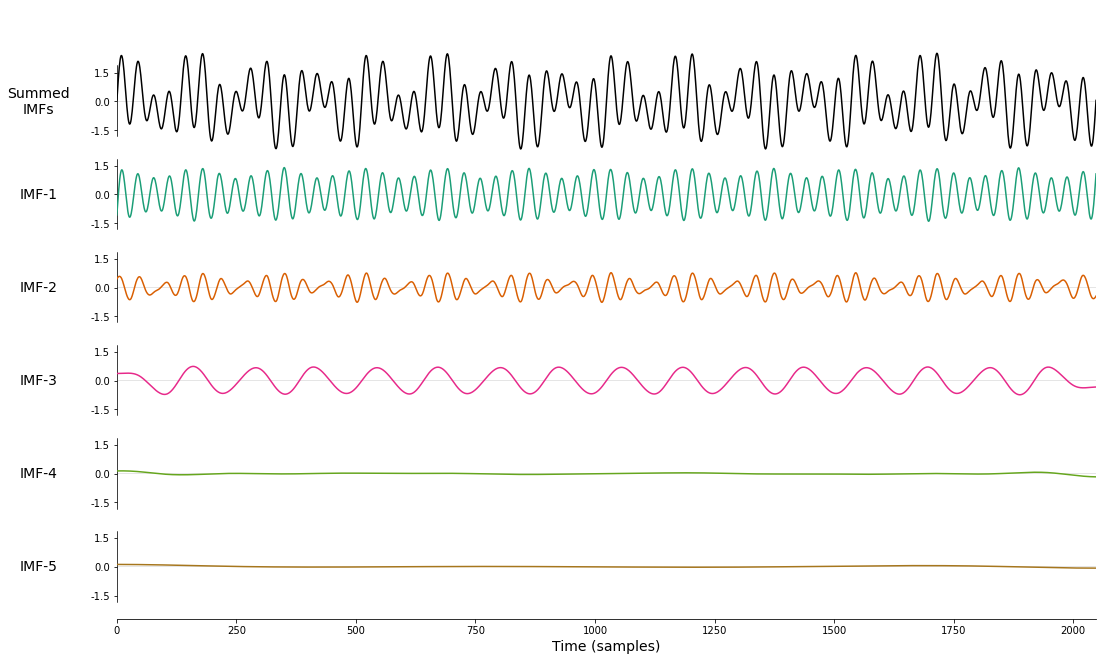

In [ ]:
imf2 = emd.sift.sift(xy, max_imfs=5)
imf3 = emd.sift.sift(xw, max_imfs=5)
imf4 = (imf2 + imf3)/2
emd.plotting.plot_imfs(imf4)

- When increasing the masking signal frequency, the amplitude modulation moves from the 30 Hz signal to the 24 Hz signal

In [ ]:
IP2, IF2, IA2 = emd.spectra.frequency_transform(imf4, sample_rate, 'nht')

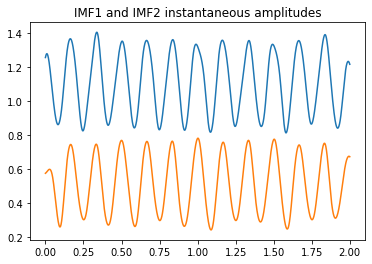

In [ ]:
plt.plot(t, IA2[:, :2])
plt.title('IMF1 and IMF2 instantaneous amplitudes')
plt.show()

#Replicando metodologia com outras senoides

In [101]:
import numpy as np
import emd 
import matplotlib.pyplot as plt 

seconds = 5
sample_rate = 1024
t = np.linspace(0, seconds, seconds*sample_rate)

f1 = 2
f2 = 4
f3 = 8
f4 = 16
f5 = 32
f6 = 64

x1 = 0.7*np.sin(2*np.pi*f1*t) 
x2 = 0.7*np.sin(2*np.pi*f2*t)
x3 = 1.4*np.sin(2*np.pi*f3*t)
x4 = 1.4*np.sin(2*np.pi*f4*t)
x5 = 2*np.sin(2*np.pi*f5*t)
x6 = 2*np.sin(2*np.pi*f6*t)
x = x1 + x2 + x3 + x4 + x5 + x6

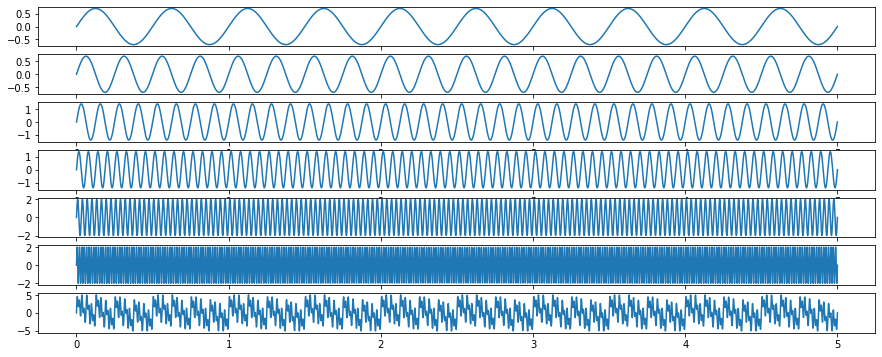

In [102]:
#plot the signals individually
fig, ax = plt.subplots(7,1, figsize=(15,6))
ax[0].plot(t,x1)
ax[1].plot(t,x2)
ax[2].plot(t,x3)
ax[3].plot(t,x4)
ax[4].plot(t,x5)
ax[5].plot(t,x6)
ax[6].plot(t,x)

/usr/local/lib/python3.8/dist-packages/emd/plotting.py:133: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


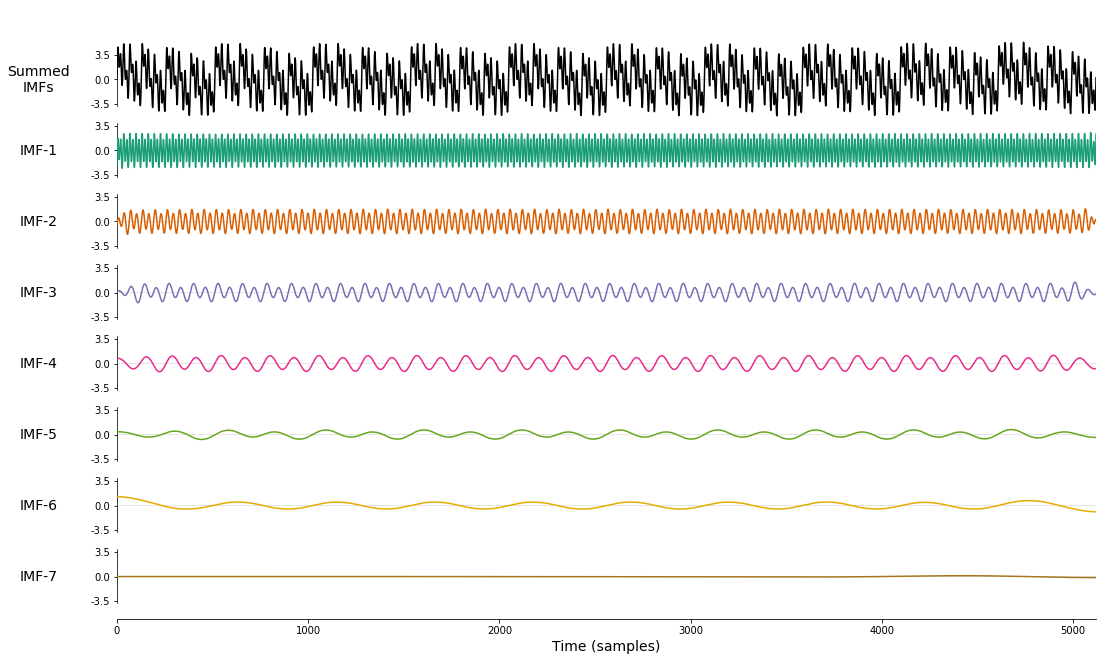

In [103]:
imf = emd.sift.sift(x, max_imfs=7)
emd.plotting.plot_imfs(imf)

In [104]:
IP, IF, IA = emd.spectra.frequency_transform(imf, sample_rate, 'nht', smooth_freq=31)

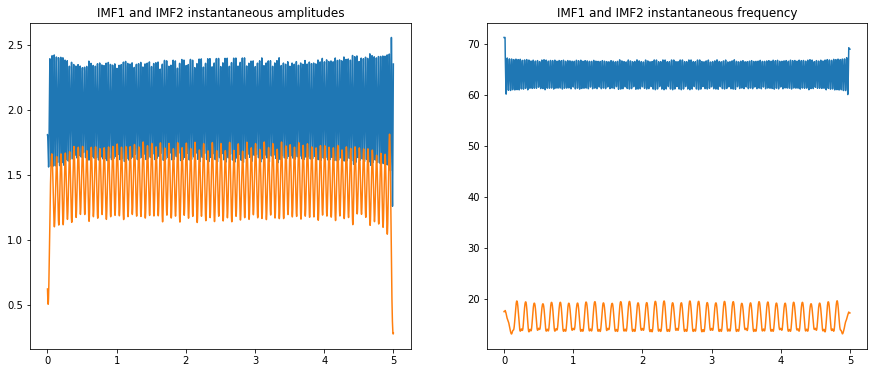

In [105]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
ax[0].plot(t, IA[:, :2])
ax[0].set_title('IMF1 and IMF2 instantaneous amplitudes')
ax[1].plot(t, IF[:,:3:2])
ax[1].set_title('IMF1 and IMF2 instantaneous frequency')
plt.show()

In [106]:
Kmin = IA[:,:1].min()
Kmax = IA[:,:1].max()

In [107]:
Fmin = IF[:,:1].min()
Fmax = IF[:,:1].max()

In [108]:
A1 = Kmin + 0.7
B1 = A1 - Kmin

print(A1)
print(B1)

1.9584517207755812
0.7


In [109]:
from scipy.signal import find_peaks

deltaf =  find_peaks(IA[:,1])

In [112]:
f21 = Fmax - ((A1*len(deltaf))/(A1-B1))  
print(f21)

68.07716859189856


In [120]:
fm = 130
xm = 2.5*np.cos(2*np.pi*fm*t)
xy = x + xm
xw = x - xm

/usr/local/lib/python3.8/dist-packages/emd/plotting.py:133: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


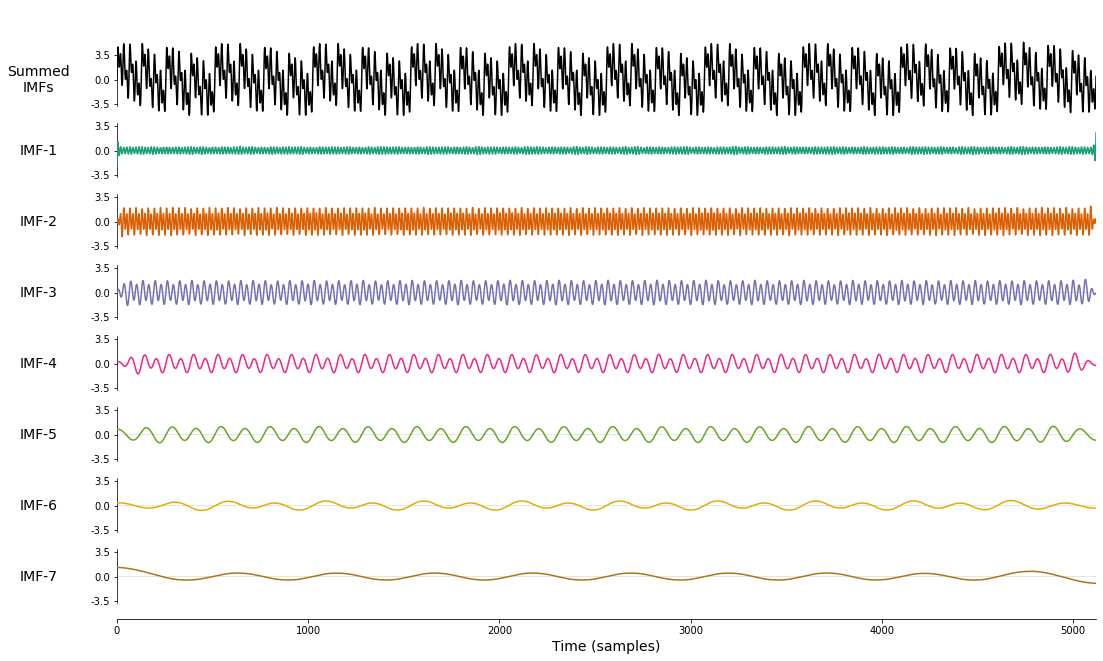

In [121]:
imf2 = emd.sift.sift(xy, max_imfs=7)
imf3 = emd.sift.sift(xw, max_imfs=7)
imf4 = (imf2 + imf3)/2
emd.plotting.plot_imfs(imf4)

#Simulando com meus dados

In [169]:
from scipy.io import loadmat

path = r'/content/drive/MyDrive/Colab Notebooks/cleaned_50hz/0000101_50hz.set'

matdat1 = loadmat(path)
data = matdat1['data'][8]

sample_rate = 200

In [170]:
t = matdat1['times'][0]

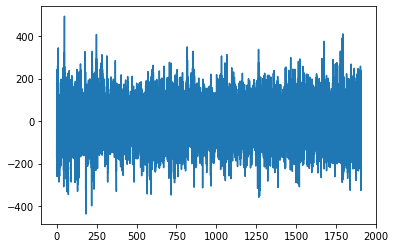

In [144]:
plt.plot(t/sample_rate,data)

/usr/local/lib/python3.8/dist-packages/emd/plotting.py:133: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


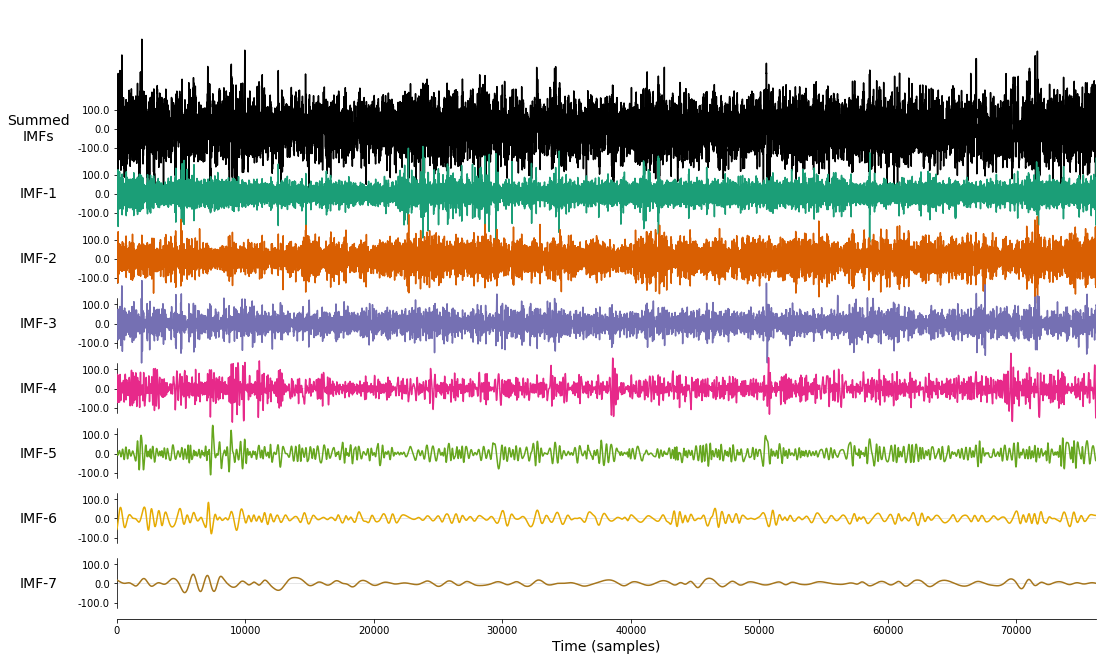

In [171]:
imf = emd.sift.sift(data, max_imfs=7)
emd.plotting.plot_imfs(imf)

In [172]:
IP, IF, IA = emd.spectra.frequency_transform(imf, sample_rate, 'nht', smooth_freq=41)

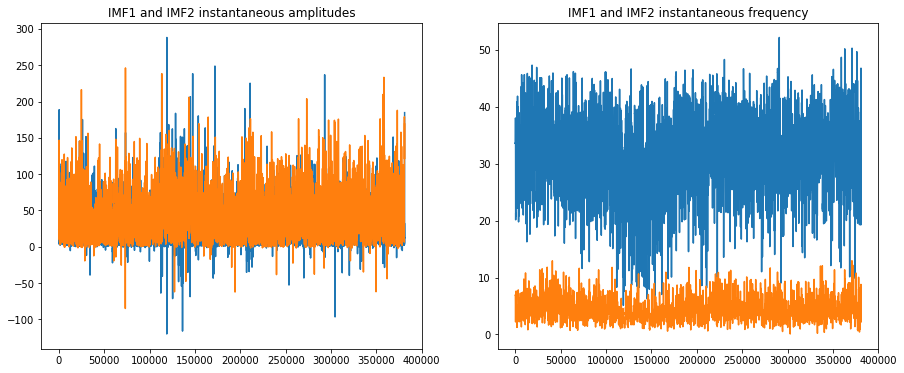

In [173]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
ax[0].plot(t, IA[:, :2])
ax[0].set_title('IMF1 and IMF2 instantaneous amplitudes')
ax[1].plot(t, IF[:,:3:2])
ax[1].set_title('IMF1 and IMF2 instantaneous frequency')
plt.show()

In [174]:
Kmin = IA[:,:1].min()
Kmax = IA[:,:1].max()

In [175]:
Fmin = IF[:,:1].min()
Fmax = IF[:,:1].max()

In [176]:
A1 = Kmin + 0.1
B1 = A1 - Kmin

print(A1)
print(B1)

-119.94847417855925
0.09999999999999432


In [177]:
from scipy.signal import find_peaks

deltaf =  find_peaks(IA[:,1])

In [178]:
f21 = Fmax - ((A1*len(deltaf))/(A1-B1))  
print(f21)

50.1689819553961


In [179]:
fm = 150
xm = 2.5*np.cos(2*np.pi*fm*t)
xy = data + xm
xw = data - xm

/usr/local/lib/python3.8/dist-packages/emd/plotting.py:133: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


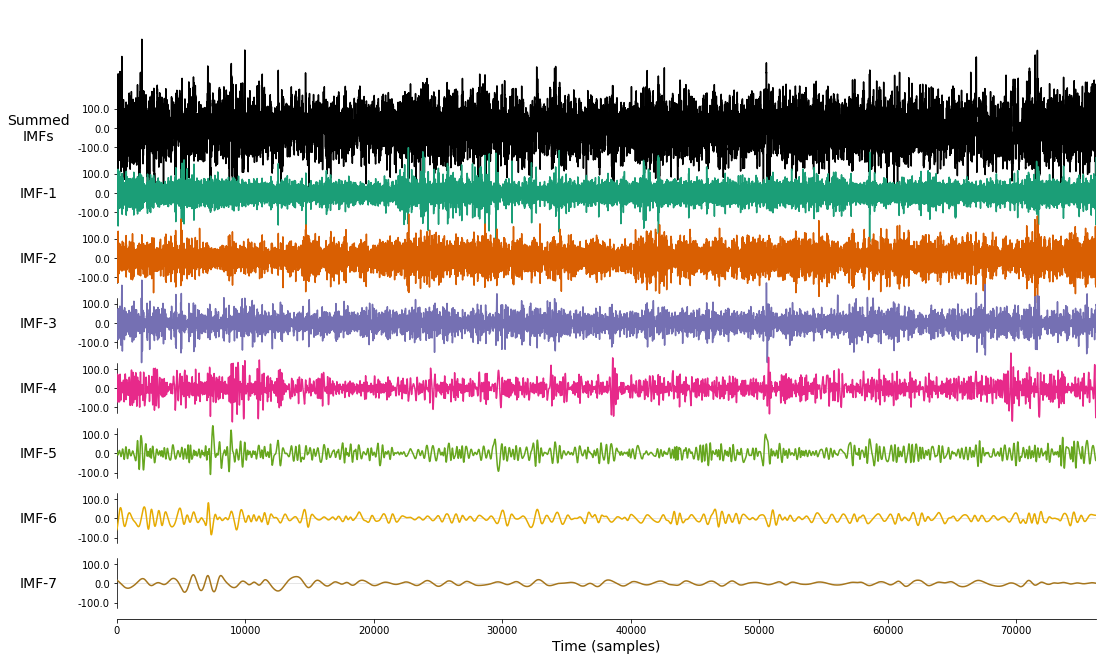

In [180]:
imf2 = emd.sift.sift(xy, max_imfs=7)
imf3 = emd.sift.sift(xw, max_imfs=7)
imf4 = (imf2 + imf3)/2
emd.plotting.plot_imfs(imf4)

In [181]:
IP2, IF2, IA2 = emd.spectra.frequency_transform(imf4, sample_rate, 'nht')

In [193]:
IF2[2]

array([21.75380217, 16.0712377 , 10.97414844,  1.80874393,  4.44113465,
        1.14467354,  2.34731174])

In [188]:
from scipy import ndimage

carrier_hist = (1, 100, 128,'log')

#and one for the amplitude modulations
am_hist = (1e-2, 100, 128, 'log')

fcarrier, fam, holo = emd.spectra.holospectrum(IF, IF2, IA2,sample_rate, carrier_hist, am_hist, return_sparse=True)
sholo = ndimage.gaussian_filter(holo, 1)

IndexError: ignored

<ipython-input-168-d1f38d437eef>:2: UserWarning: The following kwargs were not used by contour: 'shade'
  cp = ax.contourf(fcarrier, fam, sholo.T, cmap = 'jet', shade = 'nearest', levels=np.linspace(np.min(sholo.T), np.max(sholo.T), 40))


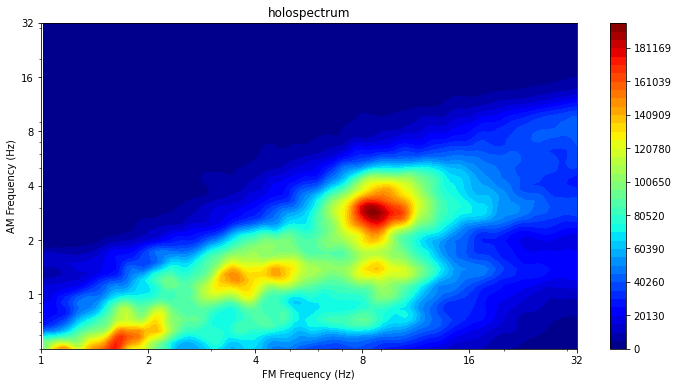

In [168]:
fig,ax=plt.subplots(1,1, figsize=(12,6))
cp = ax.contourf(fcarrier, fam, sholo.T, cmap = 'jet', shade = 'nearest', levels=np.linspace(np.min(sholo.T), np.max(sholo.T), 40))
plt.yscale('log')
plt.xscale('log')
plt.ylim(0.5,32)
plt.xlim(1,32)
plt.yticks(2**np.arange(6),2**np.arange(6))
plt.xticks(2**np.arange(6),2**np.arange(6))
plt.colorbar(cp)
#cb.set_label(r'$V^{2}$', rotation=0)
ax.set_title('holospectrum')
ax.set_xlabel('FM Frequency (Hz)')
ax.set_ylabel('AM Frequency (Hz)')
plt.show()